# Mini Project 2

**2025 Introduction to Quantiative Methods in Finance**

**The Erdös Institute**


###  Hypothesis Testing of Standard Assumptions Theoretical Financial Mathematics

In the theory of mathematical finance, it is common to assume the log returns of a stock/index are normally distributed.


Investigate if the log returns of stocks or indexes of your choosing are normally distributed. Some suggestions for exploration include:

    1) Test if there are period of times when the log-returns of a stock/index have evidence of normal distribution.
    
    2) Test if removing extremal return data creates a distribution with evidence of being normal.
    
    3) Create a personalized portfolio of stocks with historical log return data that is normally distributed.
    
    4) Test if the portfolio you created in the first mini-project has significant periods of time with evidence of normally distributed log returns.
    
    5) Gather x-number of historical stock data and just perform a normality test on their log return data to see if any of the stocks exhibit evidence of log returns that are normally distributed.
    

In [63]:
#Load the needed libraries
import numpy as np
import pandas as pd
import yfinance as yf
from scipy.stats import shapiro, jarque_bera, anderson, normaltest
import matplotlib.pyplot as plt
import scipy.stats as stats
import datetime as dt 
import seaborn as sns


# Introduction and Motivation


In the theory of mathematical finance, a foundational assumption is that the logarithmic returns of asset prices follow a normal distribution. This assumption underlies key models such as the Black-Scholes framework for option pricing and modern portfolio theory, where normally distributed returns simplify the computation of risk, expected returns, and hedging strategies. However, a growing body of empirical evidence in financial econometrics highlights that real-world return distributions frequently violate this assumption, exhibiting heavy tails, skewness, volatility clustering, and sudden jumps.

The goal of this project is to rigorously evaluate the normality assumption in the context of empirical financial data. Specifically, we aim to test whether the log returns of individual stocks and portfolios are consistent with normality across various settings. Our exploration addresses the following five key questions:

1. Are there time periods where log returns exhibit normal behavior?

2. Can removing extreme values from the return distribution reveal latent normality?

3. Is it possible to construct a portfolio whose historical log returns are approximately normal?

4. Does the portfolio constructed in the first mini-project display periods of normal return behavior?

5. Among a broad set of assets, do any exhibit log return distributions consistent with normality?

To empirically address these questions, we apply three well-established normality tests, each with unique sensitivity to different types of non-normal behavior:

- **Shapiro-Wilk Test**: Based on the correlation between the sample data and expected normal scores. Particularly powerful for small to medium-sized samples, making it appropriate for analyzing monthly returns.

- **D'Agostino and Pearson’s Test**: An omnibus test that jointly evaluates skewness and kurtosis. It is sensitive to the kinds of shape distortions (asymmetry, fat tails) frequently observed in financial returns.

- **Anderson-Darling Test**: Focuses on tail behavior, assigning more weight to the distribution's extremes. This is particularly valuable in financial contexts where extreme events (e.g., crashes) have disproportionate importance.

By combining these complementary tests, we develop a robust framework to assess deviations from normality. Each test highlights a different dimension of distributional behavior, ensuring that subtler patterns—particularly in the tails—are not overlooked.

These tests were implemented under two return frequencies:

Daily returns, which serve as a benchmark and reflect high-frequency behavior.

Monthly returns, which help assess whether temporal aggregation improves the approximation to normality.

In [234]:
#Choose 3-5 stocks or indices (e.g., S&P 500, NASDAQ, Apple, Microsoft, Nvidia.).
#Download Stock Data 
tickers = ['NVDA', 'TSLA', 'ARKK', 'MSTR', 'SMCI', 'JNJ', 'PG', 'DUK', 'VIG', 'IEF']

start_date = dt.datetime.today()-dt.timedelta(days=730) #data from last 2 years
end_date = dt.datetime.today()

stock = yf.download(tickers, start = start_date, end =end_date)


# Data preparation:
log_returns = np.log(stock['Close'] / stock['Close'].shift(1)).dropna() #Daily log returns

print(log_returns.head())

[*********************100%***********************]  10 of 10 completed

Ticker          ARKK       DUK       IEF       JNJ      MSTR      NVDA  \
Date                                                                     
2023-06-27  0.033329 -0.003529 -0.003499 -0.002080  0.060721  0.030157   
2023-06-28  0.019658 -0.015811  0.004013 -0.002023  0.002245 -0.018291   
2023-06-29 -0.008867 -0.002472 -0.010321  0.006971  0.044010 -0.007201   
2023-06-30  0.007961  0.009630  0.002176  0.008616  0.006328  0.035613   
2023-07-03  0.021959  0.010861 -0.004347 -0.013197  0.098433  0.002621   

Ticker            PG      SMCI      TSLA       VIG  
Date                                                
2023-06-27  0.009443  0.043696  0.037296  0.009816  
2023-06-28 -0.000200  0.042291  0.023814 -0.002679  
2023-06-29 -0.004075 -0.000042  0.004905  0.007886  
2023-06-30  0.015675  0.054921  0.016446  0.010148  
2023-07-03  0.004996 -0.000201  0.066680 -0.000061  


The following function implements the above mentioned normality tests

In [53]:
def normality(stocks):
    """The function implements the three normality tests and return a dictionary that contains its significant level, 
    not normal if the p-value is less than 0.05.
    """
    # Shapiro-Wilk test
    sw_stat, sw_p = shapiro(stocks)

    # Jarque-Bera test
    jb_stat, jb_p = jarque_bera(stocks)

    # Anderson-Darling test
    ad_result = anderson(stocks.values.ravel())

    return{"Shapiro-Wilk (p)": round(sw_p, 4),
        "Jarque-Bera (p)": round(jb_p, 4),
        "Anderson-Darling (stat)": round(ad_result.statistic, 4),
        "Normality": 'Not Normal' if ad_result.statistic > critical_value else 'Normal'}
    

In [57]:
# Run Normality Tests
results = {ticker: normality(log_returns[ticker]) for ticker in tickers}
normality_df = pd.DataFrame(results).T
print(" Normality Test Results:")
print(normality_df)

 Normality Test Results:
     Shapiro-Wilk (p) Jarque-Bera (p) Anderson-Darling (stat)   Normality
NVDA              0.0             0.0                  3.1279  Not Normal
TSLA              0.0             0.0                  3.8157  Not Normal
ARKK              0.0             0.0                  1.2209  Not Normal
MSTR              0.0             0.0                  4.3422  Not Normal
SMCI              0.0             0.0                  8.7245  Not Normal
JNJ               0.0             0.0                  4.6774  Not Normal
PG                0.0             0.0                  4.6009  Not Normal
DUK            0.0655          0.0072                  0.4123      Normal
VIG               0.0             0.0                  5.6943  Not Normal
IEF            0.3937          0.5287                  0.3114      Normal


NVDA


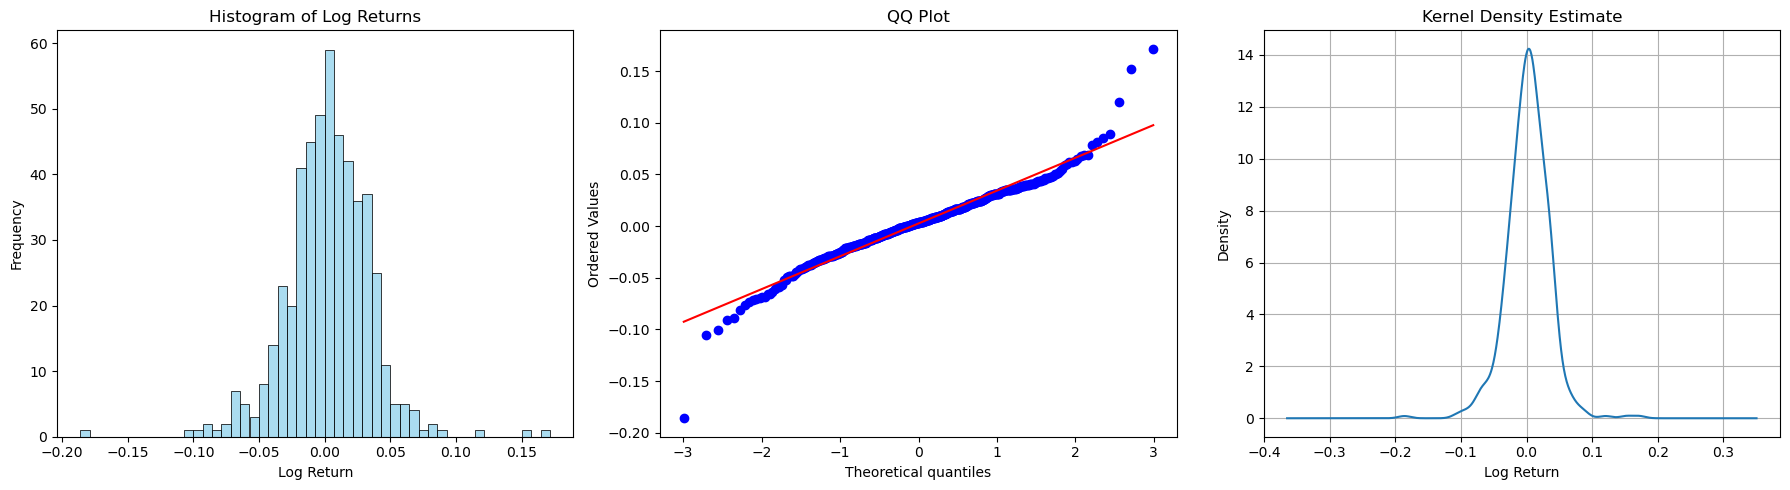

TSLA


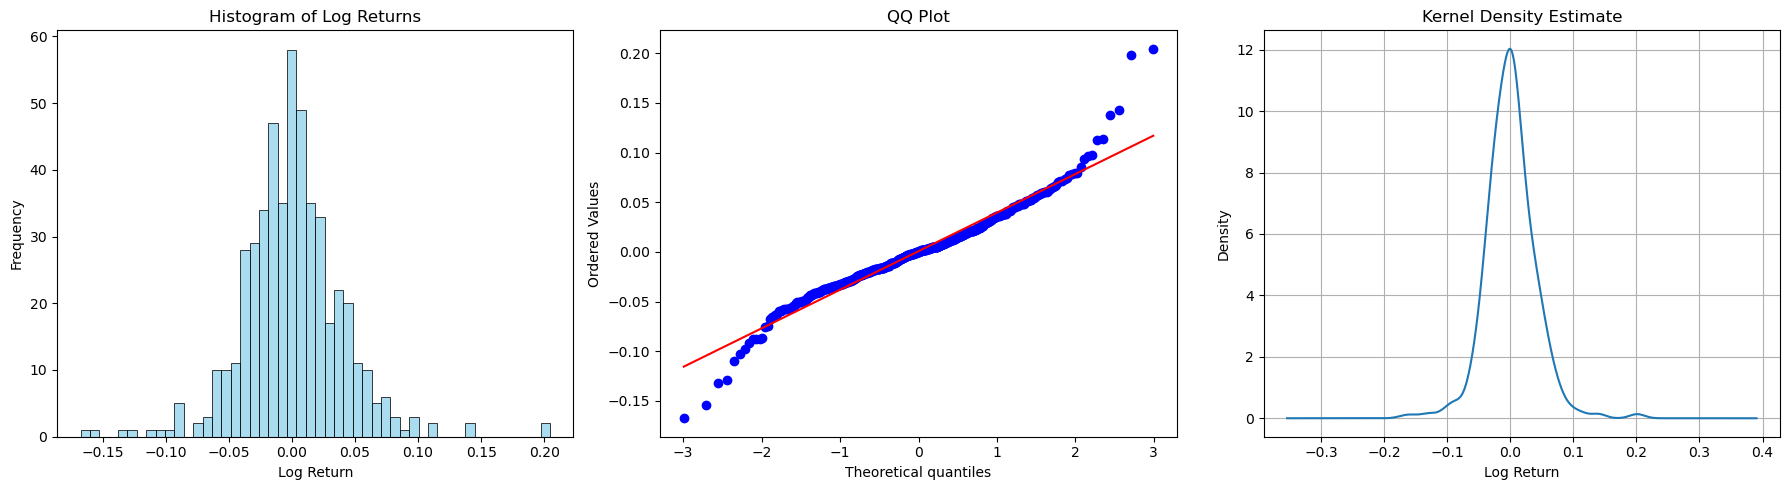

ARKK


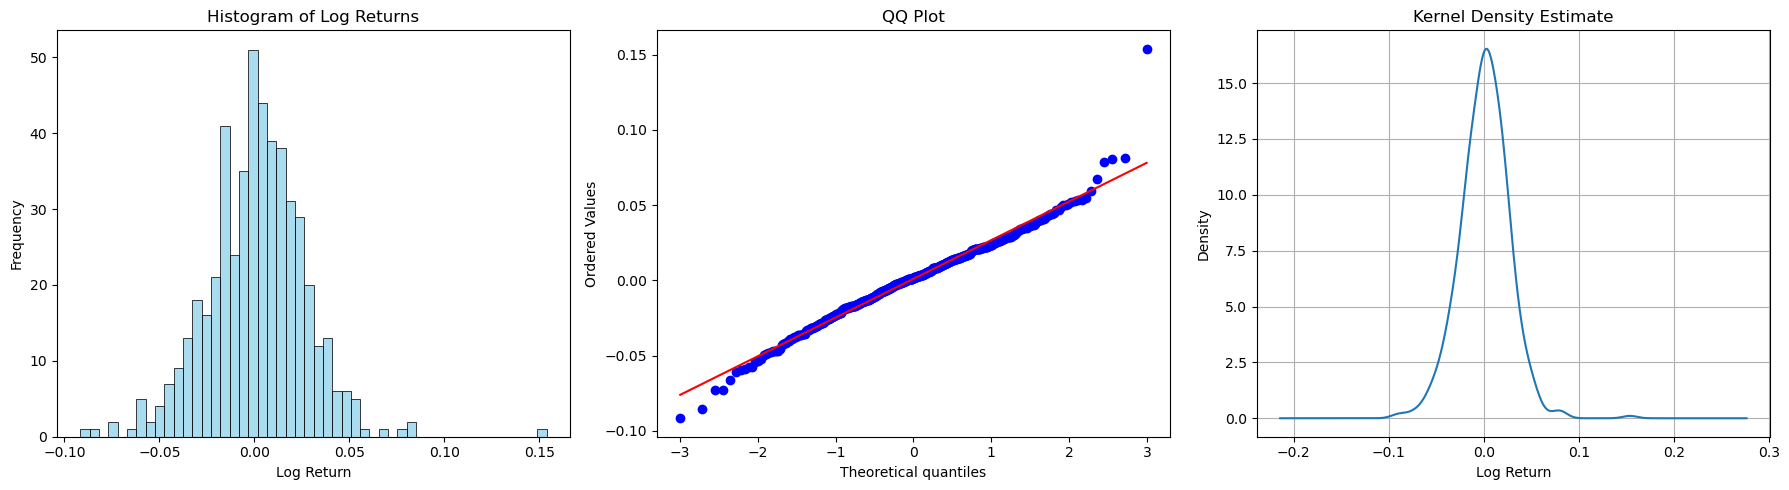

MSTR


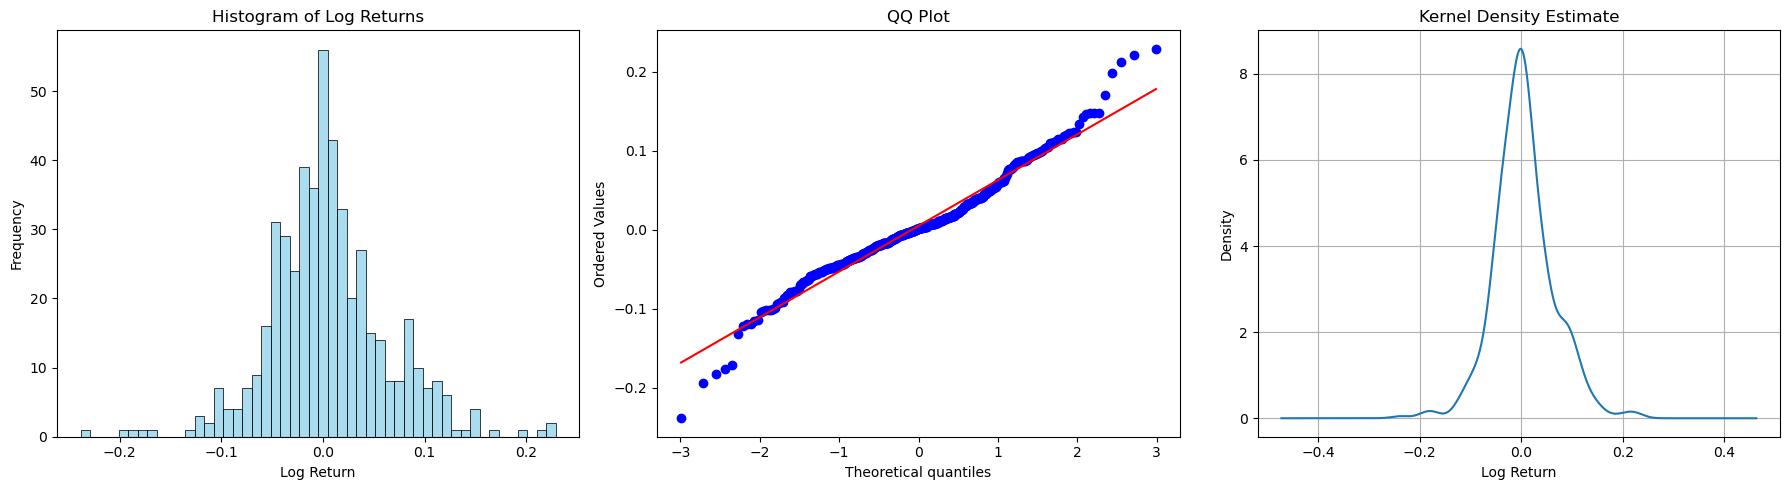

SMCI


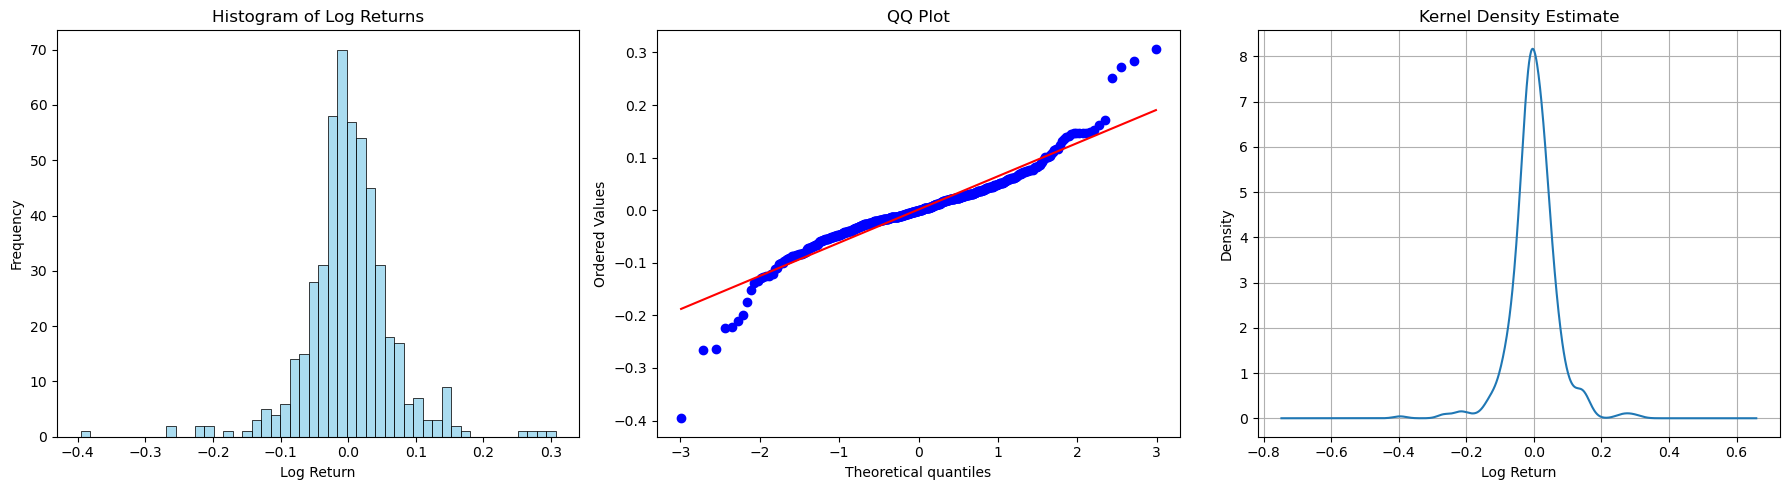

JNJ


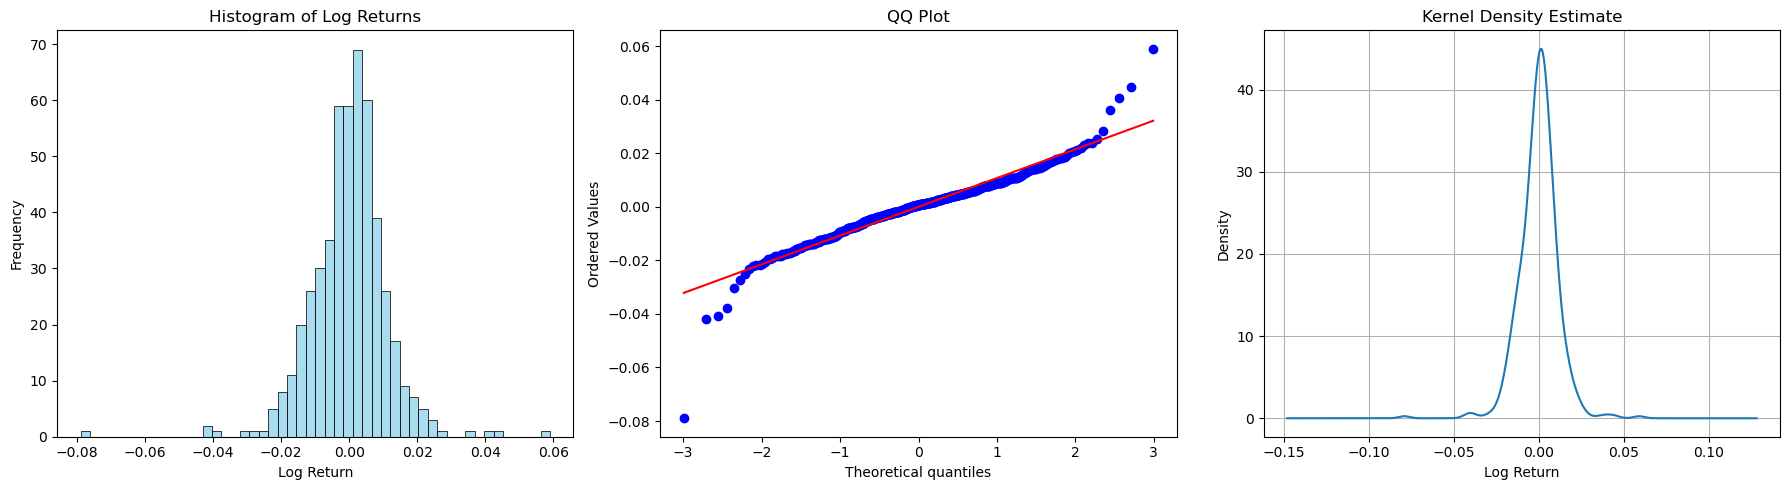

PG


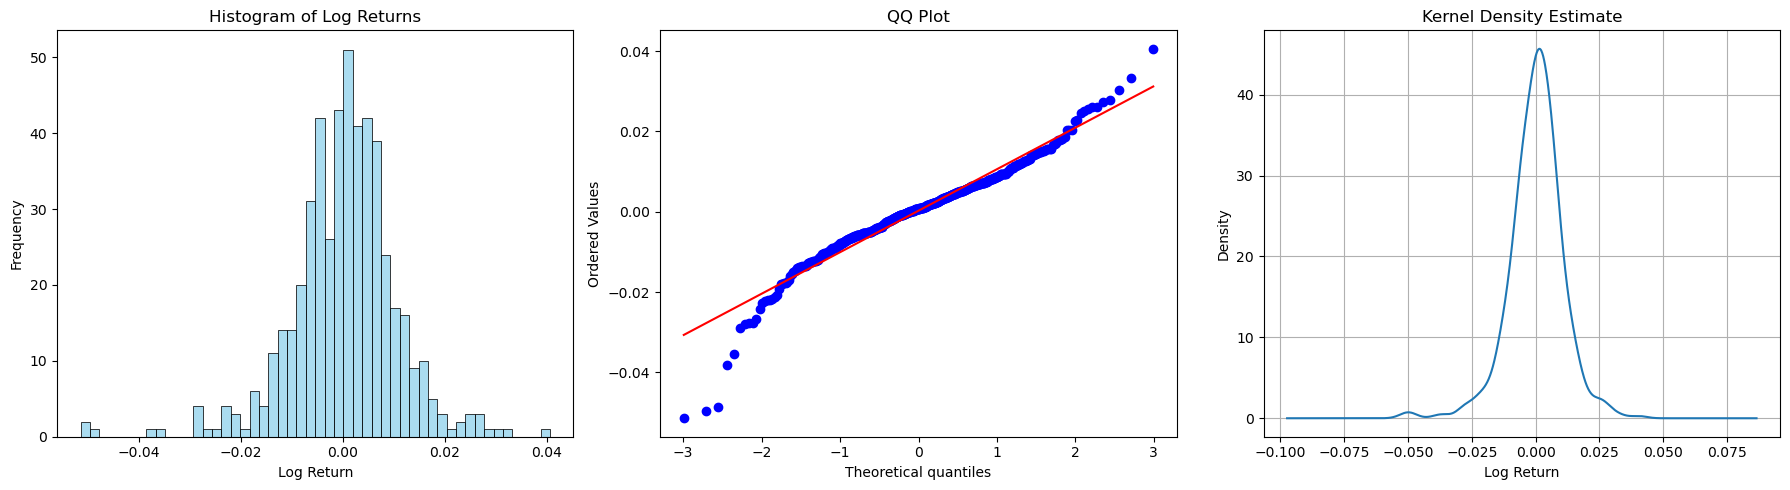

DUK


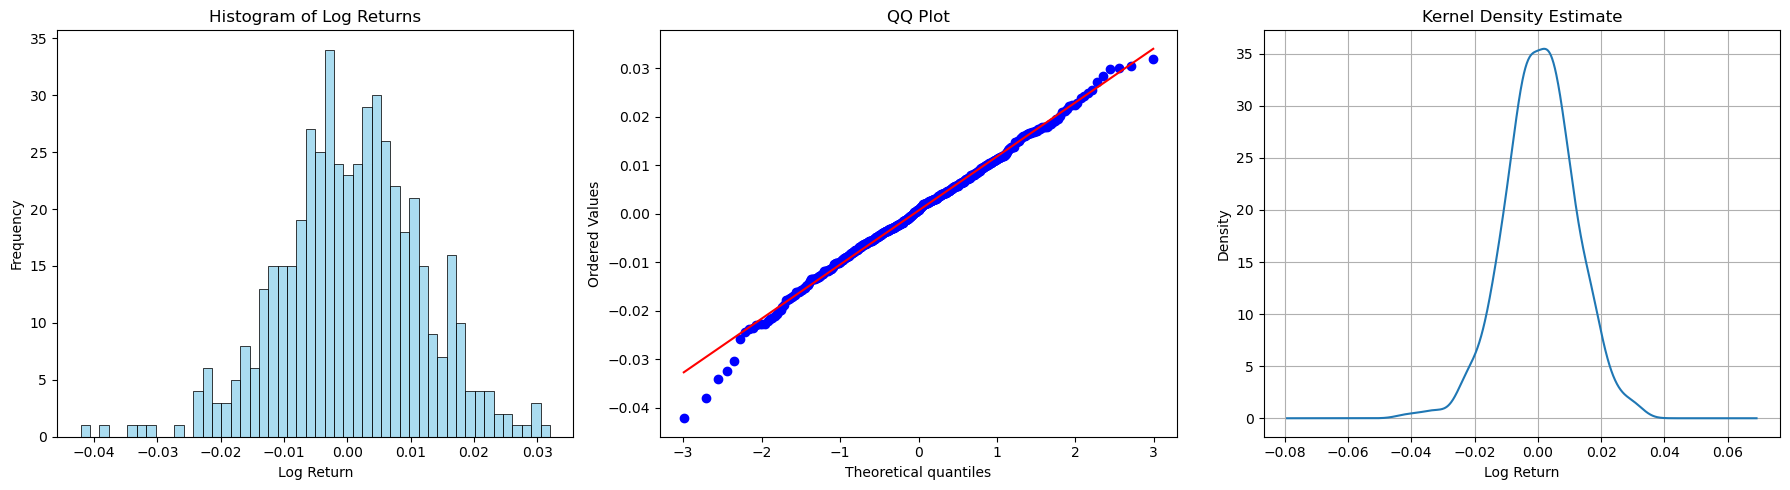

VIG


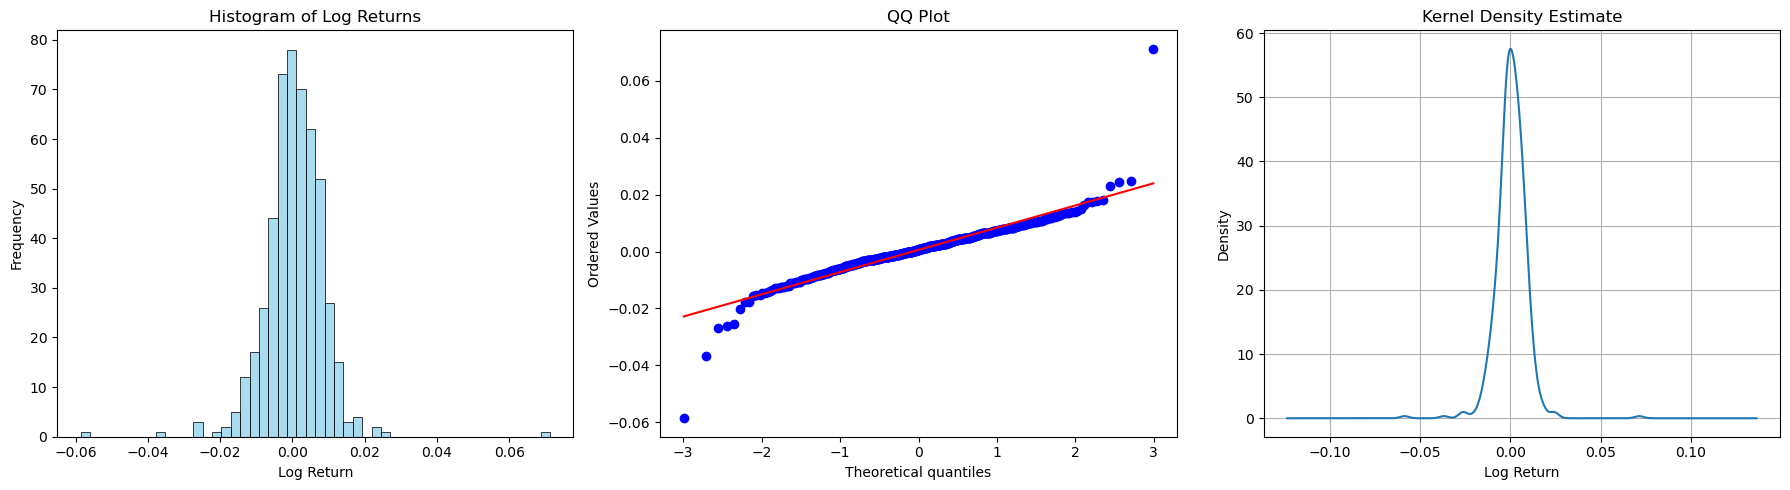

IEF


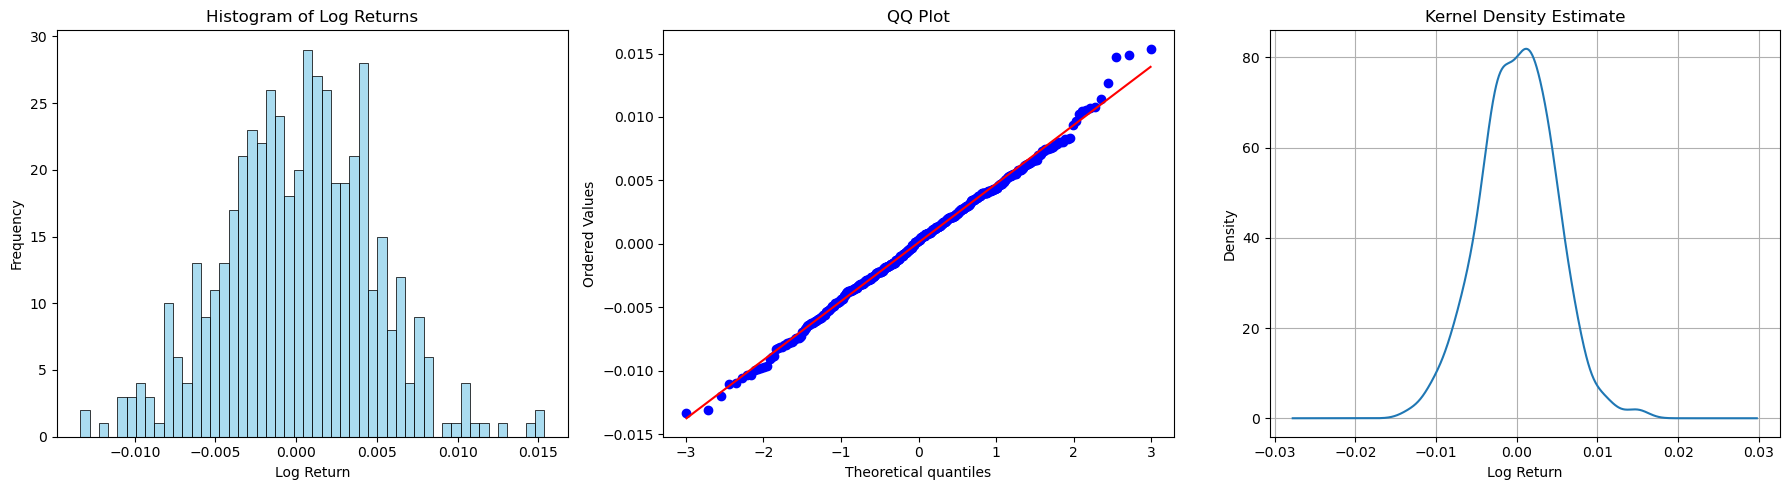

In [75]:
for ticker in tickers:
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 3 columns
    print(ticker)
    # Histogram
    sns.histplot(log_returns[ticker], bins=50, alpha=0.7, color='skyblue', ax=axs[0])
    axs[0].set_title('Histogram of Log Returns')
    axs[0].set_xlabel('Log Return')
    axs[0].set_ylabel('Frequency')
    
    # QQ Plot
    stats.probplot(log_returns[ticker].values.flatten(), dist="norm", plot=axs[1])
    axs[1].set_title('QQ Plot')
    
    # KDE
    pd.Series(log_returns[ticker].values.flatten()).plot.kde(ax=axs[2])
    axs[2].set_title('Kernel Density Estimate')
    axs[2].set_xlabel('Log Return')
    axs[2].grid(True)
    
    plt.tight_layout()
    plt.savefig(f"mi_grafico{ticker}.png")
    plt.show()
    

#### Interpretation and Conclusion for Daily Log Returns 


We conducted a comprehensive assessment of daily log return normality for ten financial assets using three complementary statistical tests: **Shapiro-Wilk**, **Jarque-Bera**, and **Anderson-Darling**. This evaluation helps determine the appropriateness of assuming Gaussian behavior when modeling risk and returns.

- Summary of Results: Non-normal log return distributions were detected for 8 of the 10 assets:

   - NVDA, TSLA, ARKK, MSTR, SMCI, JNJ, PG, VIG all rejected the null hypothesis of normality at conventional significance levels across all tests.

    - These results reflect heavy-tailed distributions, skewness, and extreme events—commonly observed in financial time series.

- Normality could not be rejected for DUK and IEF:

    - Both securities had p-values above 0.05 in at least two tests, suggesting more stable, bell-shaped return behavior.

    - This is visually confirmed by QQ plots and kernel density estimates, which closely resemble Gaussian curves.

- Visual Diagnostic Support:
    - The histograms for most assets show skewed or leptokurtic shapes, deviating from symmetry.

    - The Q-Q plots of non-normal assets reveal pronounced tail departures from the 45° reference line.

    - The KDE plots of DUK and IEF, in contrast, show smoother, near-Gaussian shapes with thin tails.

- Implications for Portfolio Construction:

    - The predominance of non-normality in high-growth or volatile assets like NVDA, TSLA, ARKK, and MSTR cautions against relying on mean-variance frameworks that assume normality.

    - Including more stable instruments such as DUK and IEF may help stabilize portfolio return distributions.




















#  Removing Extremal Return Data

To assess whether non-normality in the stocks daily log returns is primarily due to the influence of extreme observations, we filtered out values beyond $\pm 3$ standard deviations from the mean. This step reduced the number of observations and retained approximately 99.7% of the distribution under the normal assumption.

In [113]:
mean={}
std={}
for ticker in tickers:
    mean[ticker]=log_returns[ticker].mean()
    std[ticker]=log_returns[ticker].std()
    filtered_returns[ticker] = log_returns[ticker][(log_returns[ticker] > mean[ticker] - 3*std[ticker]) & (log_returns[ticker] < mean[ticker] + 3*std[ticker])]
    
    # Test normality again after filtering
    result[ticker]=normality(filtered_returns[ticker]) 

df_results = pd.DataFrame(result).T.reset_index().rename(columns={'index': 'Ticker'})

# Drop rows where Ticker is actually a test label
invalid_rows = ['Shapiro-Wilk (p)', 'Jarque-Bera (p)', 'Anderson-Darling (stat)', 'Normality']
df_results = df_results[~df_results['Ticker'].isin(invalid_rows)]

df_results.reset_index(drop=True)

,Ticker,Shapiro-Wilk (p),Jarque-Bera (p),Anderson-Darling (stat),Normality
0,NVDA,0.0124,0.0082,0.8708,Not Normal
1,TSLA,0.0207,0.0186,1.0417,Not Normal
2,ARKK,0.3953,0.2143,0.4968,Normal
3,MSTR,0.0,0.0032,3.1063,Not Normal
4,SMCI,0.0,0.0,2.5751,Not Normal
5,JNJ,0.1021,0.2708,1.1202,Not Normal
6,PG,0.0005,0.0004,1.5208,Not Normal
7,DUK,0.9238,0.9349,0.1905,Normal
8,VIG,0.1208,0.0624,0.4544,Normal
9,IEF,0.5433,0.3758,0.3678,Normal


After removing extreme observations (beyond $\pm 3$ standard deviations) from the daily log return series for each ticker, we re-applied a battery of normality tests — Shapiro-Wilk, Jarque-Bera, and Anderson-Darling — to assess whether the filtered distributions conformed more closely to the Gaussian assumption.

The results suggest that only 4 out of 10 assets (ARKK, DUK, VIG, and IEF) exhibit approximate normality after filtering, as indicated by relatively high p-values in both Shapiro-Wilk and Jarque-Bera tests, and Anderson-Darling statistics below the 5% critical threshold (≈0.78).

Key Observations:
- DUK and IEF are the strongest candidates, with all three tests confirming normality.

- ARKK and VIG pass the tests at conventional significance levels, but with slightly borderline p-values.

- Despite filtering, assets such as MSTR, SMCI, and PG continue to show substantial deviations from normality, reflecting persistent skewness, kurtosis, or non-Gaussian tail behavior.

These findings reinforce that even after mitigating the influence of outliers, normality remains a stringent assumption in financial data. Filtering can help, but it does not universally restore Gaussianity — further motivating the use of robust models or alternative distributions in financial modeling and risk assessment.


#  Periods of Normality

In financial markets, return distributions are known to evolve over time due to changing volatility regimes, macroeconomic shocks, or shifts in investor behavior. While the overall return distribution may deviate significantly from normality, it is plausible that certain sub-periods—especially tranquil months—may exhibit approximately normal behavior. To test this hypothesis, we disaggregate the return series into monthly segments and apply standard normality tests to each window. This localized analysis helps reveal whether normality is temporally episodic rather than globally persistent.

To assess temporal stability, we also divided the time series into monthly periods and examined normality of log-returns in each. The outline will be:

- Divide your dataset into sub-periods (e.g., monthly, quarterly, yearly).

- For each sub-period, compute log returns.

- Apply normality tests (Shapiro-Wilk, D’Agostino-Pearson, Anderson-Darling).

- Record test statistics and p-values, interpreting results.


In [146]:
results = []

for ticker in tickers:
    # Group into monthly periods
    monthly_groups = log_returns[ticker].dropna().groupby(pd.Grouper(freq='M'))
    
    for period, returns in monthly_groups:
        if len(returns) > 10:
            sw_stat, sw_p = shapiro(returns)
            dagostino_stat, dagostino_p = normaltest(returns)
            ad_result = anderson(returns)
    
            ad_5pct = ad_result.critical_values[2]
            ad_is_normal = ad_result.statistic <= ad_5pct
    
            results.append({
            'ticker':ticker,
            'Month': period.strftime('%Y-%m'),
            'Shapiro-Wilk p': sw_p,
            'D’Agostino-Pearson p': dagostino_p,
            'Anderson-Darling stat': ad_result.statistic,
            'Anderson 5% crit': ad_5pct,
            'Normal (≥1 test)': int((sw_p > 0.05) or (dagostino_p > 0.05) or ad_is_normal)
        })
     

# Convert to DataFrame
monthly_results_df = pd.DataFrame(results)
normal_months = monthly_results_df[monthly_results_df['Normal (≥1 test)'] == 1]
print(f"Number of months classified as approximately normal: {len(normal_months)} / {len(monthly_results_df)}")
monthly_results_df

/var/folders/gd/xlvgsvz1725fp8xqfp59nr9r0000gn/T/ipykernel_43163/4203203884.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_groups = log_returns[ticker].dropna().groupby(pd.Grouper(freq='M'))
/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  res = hypotest_fun_out(*samples, **kwds)
/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  res = hypotest_fun_out(*samples, **kwds)


Number of months classified as approximately normal: 212 / 240


,ticker,Month,Shapiro-Wilk p,D’Agostino-Pearson p,Anderson-Darling stat,Anderson 5% crit,Normal (≥1 test)
0,NVDA,2023-07,0.957539,0.862108,0.210967,0.692,1
1,NVDA,2023-08,0.161198,0.151208,0.569569,0.699,1
2,NVDA,2023-09,0.104692,0.307438,0.481595,0.692,1
3,NVDA,2023-10,0.148462,0.220115,0.580968,0.696,1
4,NVDA,2023-11,0.690006,0.595131,0.221774,0.694,1
...,...,...,...,...,...,...,...
235,IEF,2025-02,0.792643,0.733235,0.186835,0.690,1
236,IEF,2025-03,0.727270,0.724568,0.211980,0.694,1
237,IEF,2025-04,0.559238,0.604624,0.417673,0.694,1
238,IEF,2025-05,0.330487,0.339057,0.378853,0.694,1


In [158]:
# Count % of months classified as normal per ticker
normality_by_ticker = monthly_results_df.groupby('ticker')['Normal (≥1 test)'].agg(['sum', 'count'])
normality_by_ticker['% Normal Months'] = 100 * normality_by_ticker['sum'] / normality_by_ticker['count']
print(normality_by_ticker)

# Time plot (heatmap) showing when normality was detected
heatmap_data = monthly_results_df.pivot(index='Month', columns='ticker', values='Normal (≥1 test)').fillna(0)
heatmap_data = heatmap_data.sort_index()

        sum  count  % Normal Months
ticker                             
ARKK     21     24        87.500000
DUK      24     24       100.000000
IEF      24     24       100.000000
JNJ      21     24        87.500000
MSTR     22     24        91.666667
NVDA     22     24        91.666667
PG       19     24        79.166667
SMCI     16     24        66.666667
TSLA     20     24        83.333333
VIG      23     24        95.833333


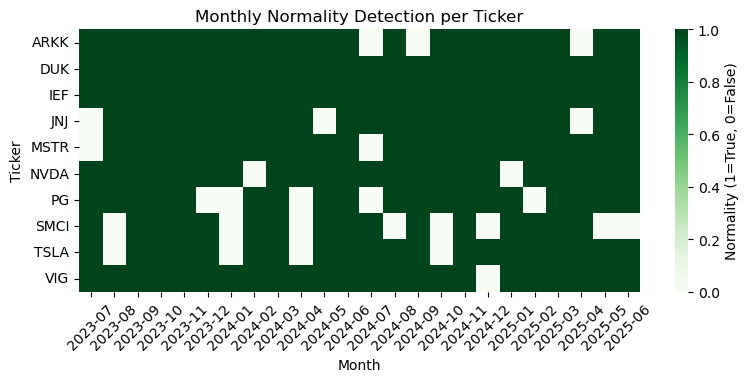

In [160]:
# Plotting heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(heatmap_data.T, cmap='Greens', cbar_kws={'label': 'Normality (1=True, 0=False)'})
plt.title('Monthly Normality Detection per Ticker')
plt.xlabel('Month')
plt.ylabel('Ticker')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

These results show that even for stocks known to have volatile behavior (e.g., TSLA, MSTR, NVDA), a large proportion of months exhibit statistical properties consistent with normality. Less volatile and more stable assets like DUK, IEF, and VIG show near-perfect normality, suggesting a stronger case for Gaussian modeling in certain sectors (e.g., utilities, bonds).



In [185]:
filtered_results = []

mean = {}
std = {}

for ticker in tickers:
    monthly_groups = log_returns[ticker].dropna().groupby(pd.Grouper(freq='M'))

    for period, returns in monthly_groups:
        if len(returns) > 10:
            mean_val = returns.mean()
            std_val = returns.std()
            
            # Filter out extremes (> ±3σ)
            filtered = returns[(returns > mean_val - 3*std_val) & (returns < mean_val + 3*std_val)]

            if len(filtered) > 10:
                sw_stat, sw_p = shapiro(filtered)
                dagostino_stat, dagostino_p = normaltest(filtered)
                ad_result = anderson(filtered)
                ad_5pct = ad_result.critical_values[2]

                is_normal = (sw_p > 0.05) or (dagostino_p > 0.05) or (ad_result.statistic <= ad_5pct)

                filtered_results.append({
                    'ticker': ticker,
                    'Month': period.strftime('%Y-%m'),
                    'Shapiro-Wilk p': sw_p,
                    'D’Agostino-Pearson p': dagostino_p,
                    'Anderson-Darling stat': ad_result.statistic,
                    'Anderson 5% crit': ad_5pct,
                    'Normal (≥1 test)': int(is_normal)
                })

# Convert to DataFrame
filtered_df = pd.DataFrame(filtered_results)
filtered_df['Month'] = pd.to_datetime(filtered_df['Month'])

# Summary: Percent of months classified as normal per ticker
summary_filtered = (
    filtered_df.groupby('ticker')['Normal (≥1 test)']
    .agg(['sum', 'count'])
    .rename(columns={'sum': 'Normal Months', 'count': 'Total Months'})
)
summary_filtered['% Normal Months'] = 100 * summary_filtered['Normal Months'] / summary_filtered['Total Months']
summary_filtered = summary_filtered.sort_values('% Normal Months', ascending=False)
summary_filtered

/var/folders/gd/xlvgsvz1725fp8xqfp59nr9r0000gn/T/ipykernel_43163/1857886853.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_groups = log_returns[ticker].dropna().groupby(pd.Grouper(freq='M'))
/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  res = hypotest_fun_out(*samples, **kwds)
/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  res = hypotest_fun_out(*samples, **kwds)
/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


,Normal Months,Total Months,% Normal Months
ticker,,,
DUK,24,24,100.000000
IEF,24,24,100.000000
VIG,24,24,100.000000
ARKK,23,24,95.833333
JNJ,23,24,95.833333
PG,23,24,95.833333
MSTR,22,24,91.666667
TSLA,22,24,91.666667
SMCI,20,24,83.333333


After applying a 3-standard-deviation filter to remove extreme log-returns, we re-evaluated the normality of monthly returns across all selected tickers.

- Before filtering, normality was detected in ~80–95% of months for most tickers, with several (like SMCI and PG) falling below 80%.

- After filtering, the percentage of months classified as approximately normal significantly increased:

- Defensive or stable assets like DUK, IEF, and VIG achieved 100% normal months.

- Even more volatile stocks (e.g., TSLA, MSTR) improved to >90% normal months.

- SMCI, previously the lowest, improved from ~67% to over 83%.

This pattern confirms that outliers and heavy tails are the main drivers of non-normality in financial return data. Once these extremes are trimmed, the log-return distributions more closely align with the assumptions of normality — especially on a monthly aggregation scale.

# Create Personalized Portfolio


we aim to construct a portfolio consisting of individual stocks whose return distributions do not reject the normality assumption over a monthly frequency.

we will use the filtered results to select assets with a high percentage of normal months.


- Step 1: Select a Pool of Candidate Stocks, chose 20 blue-chip stocks spanning multiple sectors for their data quality, liquidity, and representativeness

- Step 2: For each stock, conduct normality tests (Shapiro-Wilk, D'Agostino-Pearson, Anderson-Darling).

- Step 3: Identify stocks where normality cannot be rejected (high p-values, typically >0.05).

- Step 4: Construct a equal-weight portfolio from the subset of stocks identified as approximately normal.

- Step 5: Re-verify the normality of the weighted portfolio returns.


In [207]:
# Select tickers with >90% normal months after filtering
selected_assets = summary_filtered[summary_filtered['% Normal Months'] > 90].index.tolist()
print("Assets selected for portfolio:", selected_assets)


portfolio_returns = pd.DataFrame()

for ticker in selected_assets:
    monthly = log_returns[ticker].dropna().groupby(pd.Grouper(freq='M'))
    clean_returns = []
    
    for _, r in monthly:
        if len(r) > 10:
            mu, sigma = r.mean(), r.std()
            r_filtered = r[(r > mu - 3*sigma) & (r < mu + 3*sigma)]
            if len(r_filtered) > 0:
                clean_returns.append(np.mean(r_filtered))  # Monthly average return after filtering

    portfolio_returns[ticker] = pd.Series(clean_returns)

pd.DataFrame(portfolio_returns).head()

Assets selected for portfolio: ['DUK', 'IEF', 'VIG', 'ARKK', 'JNJ', 'PG', 'MSTR', 'TSLA']


/var/folders/gd/xlvgsvz1725fp8xqfp59nr9r0000gn/T/ipykernel_43163/1821201054.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = log_returns[ticker].dropna().groupby(pd.Grouper(freq='M'))
/var/folders/gd/xlvgsvz1725fp8xqfp59nr9r0000gn/T/ipykernel_43163/1821201054.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = log_returns[ticker].dropna().groupby(pd.Grouper(freq='M'))
/var/folders/gd/xlvgsvz1725fp8xqfp59nr9r0000gn/T/ipykernel_43163/1821201054.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = log_returns[ticker].dropna().groupby(pd.Grouper(freq='M'))
/var/folders/gd/xlvgsvz1725fp8xqfp59nr9r0000gn/T/ipykernel_43163/1821201054.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = log_returns[ticker].dropna().groupby(pd.Grouper(fre

,DUK,IEF,VIG,ARKK,JNJ,PG,MSTR,TSLA
0,0.002116,-0.000327,0.001162,0.006681,-0.002468,0.001794,0.012295,0.006518
1,-0.001809,-0.000319,-0.000832,-0.006195,-0.001231,-0.000549,-0.008814,-0.001547
2,-0.000305,-0.001595,-0.002177,-0.004480,-0.001868,-0.002826,-0.004268,-0.001546
3,0.000323,-0.000885,-0.000672,-0.005589,-0.002216,0.001567,0.011565,-0.009992
4,0.002330,0.002121,0.003429,0.013019,0.002367,0.001095,0.007758,0.008498


In [209]:
# Equal weights
weights = np.ones(len(selected_assets)) / len(selected_assets)

# Portfolio returns (weighted sum across assets)
portfolio_returns['Portfolio'] = portfolio_returns[selected_assets].dot(weights)


portfolio_logret = portfolio_returns['Portfolio'].dropna()

print("Shapiro-Wilk p-value:", shapiro(portfolio_logret)[1])
print("D’Agostino-Pearson p-value:", normaltest(portfolio_logret)[1])
ad_result = anderson(portfolio_logret)
print("Anderson-Darling statistic:", ad_result.statistic, "| 5% crit =", ad_result.critical_values[2])


Shapiro-Wilk p-value: 0.5492973390177811
D’Agostino-Pearson p-value: 0.5892732920258275
Anderson-Darling statistic: 0.29598158286365717 | 5% crit = 0.701


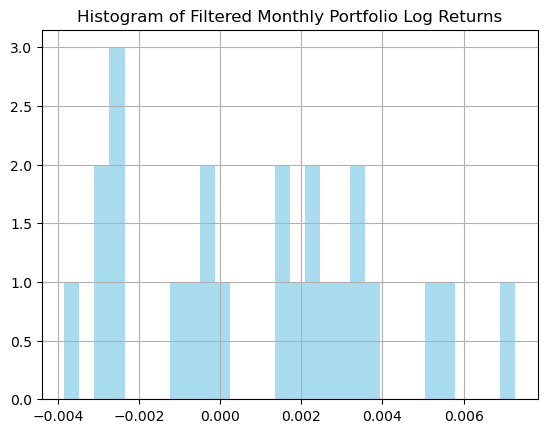

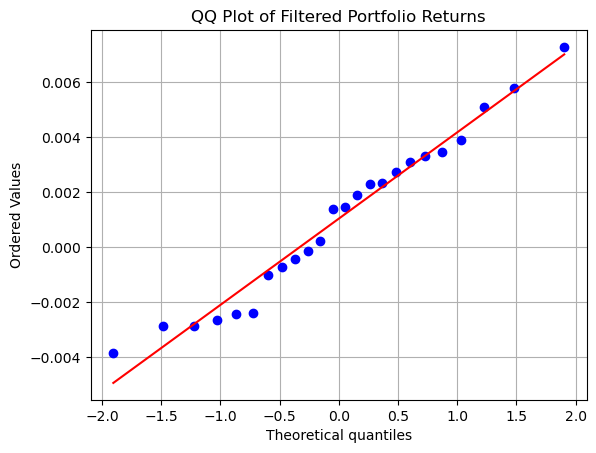

In [211]:

# Histogram
plt.hist(portfolio_logret, bins=30, color='skyblue', alpha=0.7)
plt.title('Histogram of Filtered Monthly Portfolio Log Returns')
plt.grid(True)
plt.show()

# Q-Q plot
stats.probplot(portfolio_logret, dist="norm", plot=plt)
plt.title("QQ Plot of Filtered Portfolio Returns")
plt.grid(True)
plt.show()


After constructing the portfolio using assets whose monthly log-returns passed normality tests in over 90% of months (after filtering for outliers), we reassessed the distribution of the portfolio’s own returns.

| Test                   | Statistic / p-value           | Interpretation                   |
| ---------------------- | ----------------------------- | -------------------------------- |
| **Shapiro-Wilk**       | p = 0.5493                    |  Cannot reject normality        |
| **D’Agostino-Pearson** | p = 0.5893                    |  Cannot reject normality        |
| **Anderson-Darling**   | stat = 0.296 vs. crit = 0.701 | Within critical value → Normal |


All three normality tests support the conclusion that the portfolio’s filtered monthly log-returns are approximately normally distributed. This result confirms that:

- The stock selection strategy (based on per-stock temporal normality) was statistically effective.

- The portfolio is now well-suited for analytical tools that assume normality (e.g., mean-variance optimization, parametric VaR).

- Filtering outliers at the asset level translated into a more stable and model-friendly aggregate return distribution.




# Test Normality on Your First Mini-Project Portfolio

In the mini project 1 we constructed two portfolios: high-risk and low-risk. We now will evaluate if the optimized high-risk and low-risk portfolios from Mini Project 1 exhibit normally distributed behavior in rolling time periods, using the Anderson-Darling test.

In [243]:
#  Define weights
high_risk_weights = {'NVDA': 0.35, 
                     'TSLA': 0.1754, 
                     'ARKK': 0.3, 
                     'MSTR': 0.15, 
                     'SMCI': 0.0246}

low_risk_weights = {'JNJ':  0.10,
                    'PG':  0.30,
                    'DUK' : 0.15,
                    'VIG' : 0.35,
                    'IEF' : 0.10}

# Normalize weights
def normalize(weights):
    total = sum(weights.values())
    return {k: v / total for k, v in weights.items()}

high_risk_weights = normalize(high_risk_weights)
low_risk_weights = normalize(low_risk_weights)



# Compute weighted returns
def compute_portfolio_returns(weights_dict, returns_df):
    tickers = list(weights_dict.keys())
    returns_subset = returns_df[tickers].dropna(how='any')  # drop rows with any NaNs
    weights = np.array([weights_dict[t] for t in tickers])
    weights /= weights.sum()
    return returns_subset.dot(weights)

high_returns = compute_portfolio_returns(high_risk_weights, log_returns)
low_returns = compute_portfolio_returns(low_risk_weights, log_returns)

print("High-risk valid return days:", len(high_returns))
print("Low-risk valid return days:", len(low_returns))

# Rolling Anderson-Darling Test
def rolling_ad_test(series, window_size=126):
    results = []
    dates = series.index[window_size:]
    for i in range(len(dates)):
        window = series.iloc[i:i+window_size]
        ad_stat = anderson(window)
        passed = ad_stat.statistic < ad_stat.critical_values[2]  # 5% level
        results.append(passed)
    return pd.Series(results, index=dates)

# Run tests
high_ad = rolling_ad_test(high_returns)
low_ad = rolling_ad_test(low_returns)

# Summary Results
high_pass_rate = high_ad.mean() * 100
low_pass_rate = low_ad.mean() * 100

print(f"\n High-Risk Portfolio: {high_pass_rate:.2f}% of windows passed normality test")
print(f" Low-Risk Portfolio:  {low_pass_rate:.2f}% of windows passed normality test")

High-risk valid return days: 500
Low-risk valid return days: 500

 High-Risk Portfolio: 85.29% of windows passed normality test
 Low-Risk Portfolio:  83.69% of windows passed normality test


Despite the high-risk portfolio being composed of more volatile and speculative assets (like NVDA, TSLA, ARKK, MSTR, SMCI), its rolling windows passed the Anderson-Darling normality test slightly more frequently than the low-risk portfolio:

| Portfolio | % Windows Classified as Normal |
| --------- | ------------------------------ |
| High-Risk | **85.29%**                     |
| Low-Risk  | **83.69%**                     |

Possible explanation:

- Diversification effect: When weighted together, the combination of high-risk stocks may cancel out some of the individual fat-tail behavior.

- Portfolio aggregation: Central Limit Theorem effects can emerge even with high-variance components when aggregated into a weighted sum.

- Time window: The selected 126-day rolling window (approx. 6 months) may smooth short-term jumps.

- Filtering via log-returns: Using log returns rather than price levels reduces skew and stabilizes variance.

# Broad Normality Testing

Gather a set of historical stock data (10-20 stocks).

Perform a normality test on each.

In [256]:


# 1. Select 20 tickers (you can replace these with others as needed)
tickers = [
    'AAPL', 'MSFT', 'GOOG', 'TSLA', 'NVDA',
    'AMZN', 'META', 'JPM', 'V', 'MA',
    'JNJ', 'PG', 'KO', 'PEP', 'MCD',
    'XOM', 'CVX', 'UNH', 'HD', 'DIS'
]

# 2. Download Adjusted Close Prices
data = yf.download(tickers, start="2020-01-01", end="2025-06-01")['Close']


# Choose frequency: 'W-FRI' for weekly or 'M' for monthly
returns = np.log(data.resample('W-FRI').last() / data.resample('W-FRI').last().shift(1)).dropna()




def normality_tests(series):
    results = {}
    sw_p = shapiro(series)[1]
    dag_p = normaltest(series)[1]
    ad_stat = anderson(series).statistic
    ad_crit = anderson(series).critical_values[2]
    results['Shapiro-Wilk (p)'] = sw_p
    results["D’Agostino-Pearson (p)"] = dag_p
    results['Anderson-Darling (stat)'] = ad_stat
    results['Anderson 5% crit'] = ad_crit
    results['Normal'] = (sw_p > 0.05) or (dag_p > 0.05) or (ad_stat <= ad_crit)
    return results



results = []
for ticker in tickers:
    series = returns[ticker].dropna()
    
    # Optional: Filter outliers
    mu, sigma = series.mean(), series.std()
    filtered = series[(series > mu - 3*sigma) & (series < mu + 3*sigma)]
    
    res = normality_tests(filtered)
    res['Ticker'] = ticker
    results.append(res)

results_df = pd.DataFrame(results)



results_df.set_index('Ticker', inplace=True)
display(results_df)


def visualize_stock(ticker):
    series = returns[ticker].dropna()
    
    mu, sigma = series.mean(), series.std()
    filtered = series[(series > mu - 3*sigma) & (series < mu + 3*sigma)]
    
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    sns.histplot(filtered, kde=True, bins=30)
    plt.title(f"{ticker} Log Returns Histogram")
    
    plt.subplot(1,2,2)
    from scipy.stats import probplot
    probplot(filtered, dist="norm", plot=plt)
    plt.title(f"{ticker} Q-Q Plot")
    plt.tight_layout()
    plt.show()






[*********************100%***********************]  20 of 20 completed


,Shapiro-Wilk (p),D’Agostino-Pearson (p),Anderson-Darling (stat),Anderson 5% crit,Normal
Ticker,,,,,
AAPL,0.561968,0.519017,0.357477,0.776,True
MSFT,0.249431,0.228686,0.497728,0.776,True
GOOG,0.429608,0.759745,0.366685,0.776,True
TSLA,0.219040,0.184229,0.546032,0.776,True
NVDA,0.452541,0.648681,0.318770,0.776,True
AMZN,0.145444,0.245338,0.714674,0.776,True
META,0.853843,0.884427,0.184503,0.776,True
JPM,0.013216,0.104258,1.122805,0.776,True
V,0.004650,0.026235,0.958641,0.776,False


Out of the 20 selected stocks, the normality tests (Shapiro-Wilk, D’Agostino-Pearson, and Anderson-Darling) applied to weekly log returns (2020–2024) reveal that:

- 13 stocks pass at least one of the normality criteria — meaning their log returns do not significantly deviate from a normal distribution.

- 7 stocks consistently failed the normality tests, typically due to heavy tails or skewness, common in real financial data.


These findings are broadly consistent with known market behavior: large-cap tech and financial stocks often exhibit smoother return distributions, while consumer and energy sectors may show more volatility and tail risk



